[Big Sales Data](https://www.kaggle.com/datasets/pigment/big-sales-data)

dependency: [pandas-categorical](https://pypi.org/project/pandas-categorical/)
```
pip install pandas-categorical
```


In [4]:
import numpy as np
import pandas as pd
import pandas_categorical as pdc

In [5]:
# optimal column types
SUB_DTYPES = {
    'Invoice/Item Number': "string",
    'Date': 'datetime64[ns]',
    'Store Number': "uint16",
    'Store Name': "string",
    'Address': 'string',
    'City': "string",
    'Zip Code': 'string',
    'Store Location': 'string',
    'County Number': "Int16",
    'County': "string",
    'Category': "Int32",
    'Category Name': 'string',
    'Vendor Number': "Int16",
    'Vendor Name': 'string',
    'Item Number': "string",
    'Item Description': "string",
    'Pack': "uint16",
    'Bottle Volume (ml)': "uint32",
    'State Bottle Cost': float,
    'State Bottle Retail': float,
    'Bottles Sold': int,
    'Sale (Dollars)': float,
    'Volume Sold (Liters)': float,
    'Volume Sold (Gallons)': float,
}

In [6]:
df = pd.read_csv(
    "data/raw/Liquor_Sales.csv",
    engine='pyarrow',
    dtype=SUB_DTYPES
)

In [7]:
len(df)

19666763

In [8]:
# Let's put a small part of the data aside
(_, df), (_, df_1) = df.groupby(df.index < 1000)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19665763 entries, 1000 to 19666762
Data columns (total 24 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Invoice/Item Number    string        
 1   Date                   datetime64[ns]
 2   Store Number           uint16        
 3   Store Name             string        
 4   Address                string        
 5   City                   string        
 6   Zip Code               string        
 7   Store Location         string        
 8   County Number          Int16         
 9   County                 string        
 10  Category               Int32         
 11  Category Name          string        
 12  Vendor Number          Int16         
 13  Vendor Name            string        
 14  Item Number            string        
 15  Item Description       string        
 16  Pack                   uint16        
 17  Bottle Volume (ml)     uint32        
 18  State Bottle Cost     

In [10]:
CAT_COLS = [
    'Date',
    'Store Number',
    'Store Name',
    'Address',
    'City',
    'Zip Code',
    'Store Location',
    'County Number',
    'County',
    'Category',
    'Category Name',
    'Vendor Number',
    'Vendor Name',
    'Item Number',
    'Item Description',
    'Pack',
    'Bottle Volume (ml)',
]
ORDERED_COLS = [
    'Date',
    'Bottle Volume (ml)',
]

pdc.cat_astype(df, cat_cols=CAT_COLS, sub_dtypes=SUB_DTYPES, ordered_cols=ORDERED_COLS)
pdc.cat_astype(df_1, cat_cols=CAT_COLS, sub_dtypes=SUB_DTYPES, ordered_cols=ORDERED_COLS)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19665763 entries, 1000 to 19666762
Data columns (total 24 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   Invoice/Item Number    string  
 1   Date                   category
 2   Store Number           category
 3   Store Name             category
 4   Address                category
 5   City                   category
 6   Zip Code               category
 7   Store Location         category
 8   County Number          category
 9   County                 category
 10  Category               category
 11  Category Name          category
 12  Vendor Number          category
 13  Vendor Name            category
 14  Item Number            category
 15  Item Description       category
 16  Pack                   category
 17  Bottle Volume (ml)     category
 18  State Bottle Cost      float64 
 19  State Bottle Retail    float64 
 20  Bottles Sold           int64   
 21  Sale (Dollars)         float64 

In [12]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Invoice/Item Number    1000 non-null   string  
 1   Date                   1000 non-null   category
 2   Store Number           1000 non-null   category
 3   Store Name             1000 non-null   category
 4   Address                1000 non-null   category
 5   City                   1000 non-null   category
 6   Zip Code               1000 non-null   category
 7   Store Location         1000 non-null   category
 8   County Number          1000 non-null   category
 9   County                 1000 non-null   category
 10  Category               1000 non-null   category
 11  Category Name          1000 non-null   category
 12  Vendor Number          1000 non-null   category
 13  Vendor Name            1000 non-null   category
 14  Item Number            1000 non-null   categor

array([[<Axes: title={'center': 'count'}>]], dtype=object)

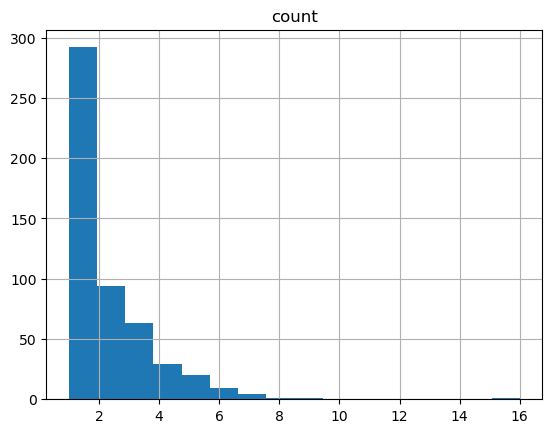

In [47]:
address_counts_1 = pd.value_counts(df_1.Address).to_frame().reset_index()
most_orders_1 = address_counts_1['count'].max() # or df.loc[df['count'].idxmax()]
address_counts_1.hist(bins=most_orders_1)

In [43]:
address_counts = pd.value_counts(df.Address).to_frame().reset_index()
address_counts

,Address,count
0,1460 2ND AVE,131882
1,3221 SE 14th St,118450
2,3221 SE 14TH ST,110527
3,,79927
4,1501 Michigan Ave,75677
...,...,...
3710,4860 Heatherstone Rd.,2
3711,"3576, Dolphin Dr",2
3712,1685 W Uintah St. #101,2
3713,"29538, 210th St.",1
